# Stock market analysis

A stock market represents the claims of companies and individuals on the shares of public companies. The prices of these shares vary depending on various factors, including inflation, demand, and reputation.

Buying and selling stocks is a major business, and people keep trying to predict the future stock behavior to earn large paybacks on their investments.

The stock data of the following four technology companies in Pakistan will be analyzed.

- Systems Ltd
- NETSOL
- PTCL
- Avanceon

We will try to answer the following questions after doing stock market data analysis:

1. How much did the stock price of each company change over time?

1. What were the daily returns for all the companies?

1. How are the stocks of the companies related to each other?

1. How much money do we risk losing by investing in a certain company?

1. Can we predict future stock behavior?

---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

              Open    High     Low   Close  Volume  mv_avg for 50 days
Time                                                                  
2018-01-01   75.50   75.50   75.00   75.00    4000                 NaN
2018-01-02   74.85   76.00   73.11   75.32  197500                 NaN
2018-01-03   74.03   74.60   72.30   72.75   21000                 NaN
2018-01-04   71.03   74.50   71.03   74.01  381500                 NaN
2018-01-05   74.35   77.00   71.00   76.52  180500                 NaN
...            ...     ...     ...     ...     ...                 ...
2018-12-24  106.00  110.00  106.00  109.60  126500            112.4658
2018-12-26  108.74  112.00  107.00  108.14   87000            112.3122
2018-12-27  110.49  110.49  107.00  108.61  400000            112.1658
2018-12-28  109.99  113.00  103.18  106.37  449000            112.0784
2018-12-31  105.88  110.50  105.75  109.87  408500            112.1110

[243 rows x 6 columns]


<AxesSubplot: xlabel='Time'>

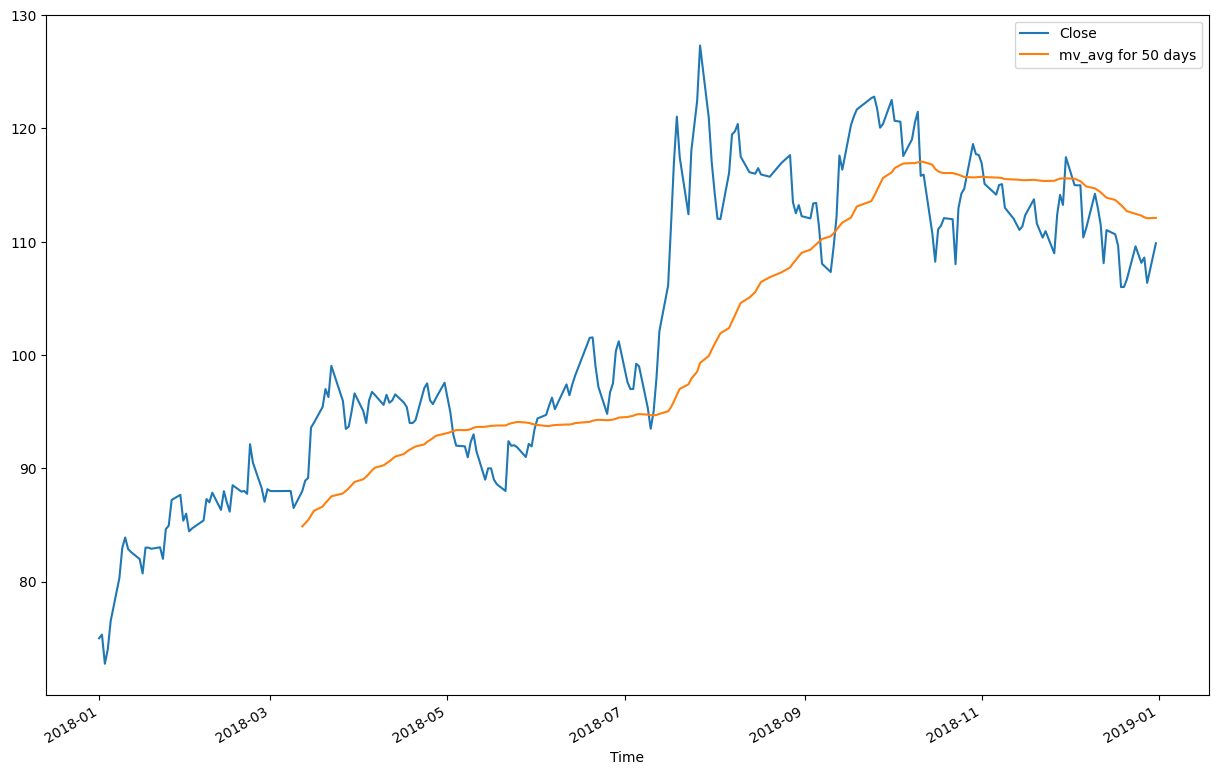

In [138]:
sys = pd.read_csv('Year_2018/SYS.csv') #The "SYS" file name can be changed to "NETSOL", "AVN" and "PTC".
# sys = pd.read_csv('../SYS.csv')
sys['Time'] = pd.to_datetime(sys.Time) # correct the format of date
sys = sys.set_index('Time') # Set Time column as row index
#filter sys for year 2022
# sys = sys['2022-01-01':'2022-12-31']

days = 50 # Moving average window
col_name = "mv_avg for " + str(days) + " days" # New column to store moving average vlues

sys[col_name] = sys['Close'].rolling(days).mean() #Calculating moving average

print(sys)

sys[['Close', 'mv_avg for 50 days']].plot(figsize=(15,10)) # Plotting the closing price with moving avarage for comprison

<AxesSubplot: xlabel='Time'>

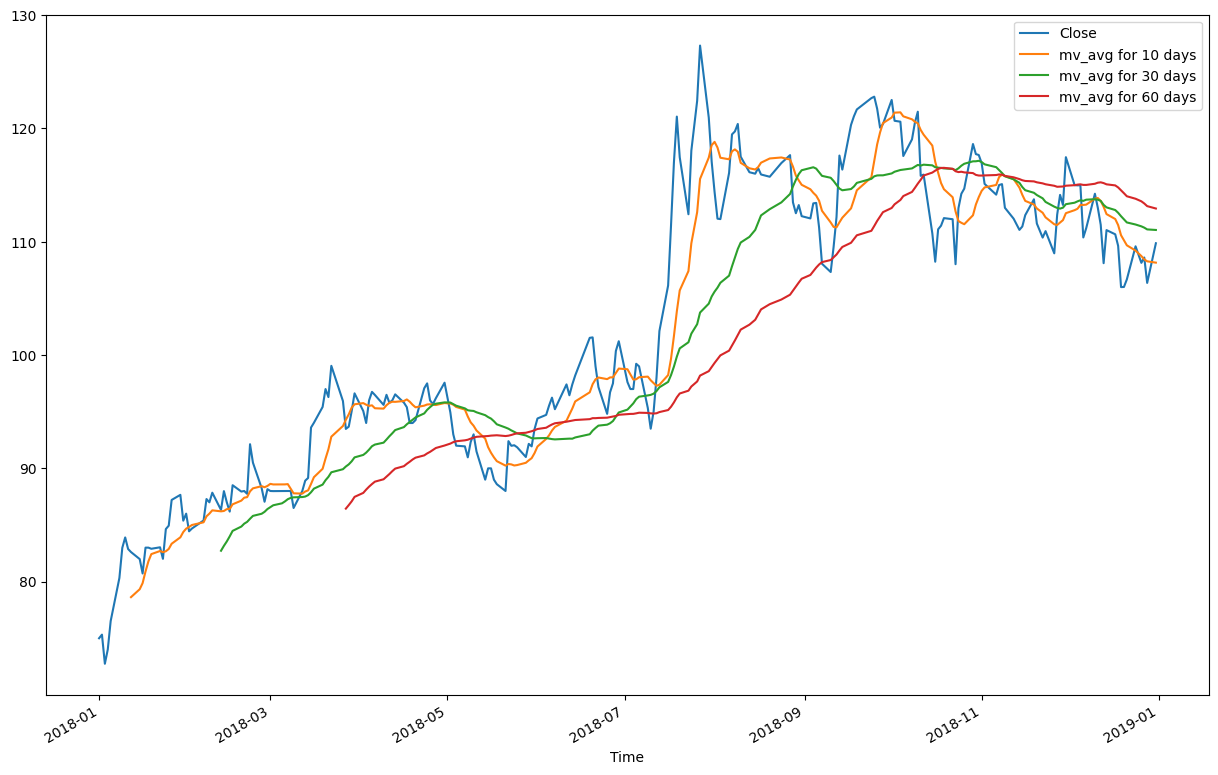

In [139]:
days = [10, 30 , 60] # Multiple number of days
for day in days:
    col_name = "mv_avg for " + str(day) + " days"
    sys[col_name] = sys['Close'].rolling(day).mean()
    
sys[['Close', 'mv_avg for 10 days', 'mv_avg for 30 days', 'mv_avg for 60 days']].plot(subplots = False, figsize=(15,10))

<AxesSubplot: xlabel='Time', ylabel='Percentage Change'>

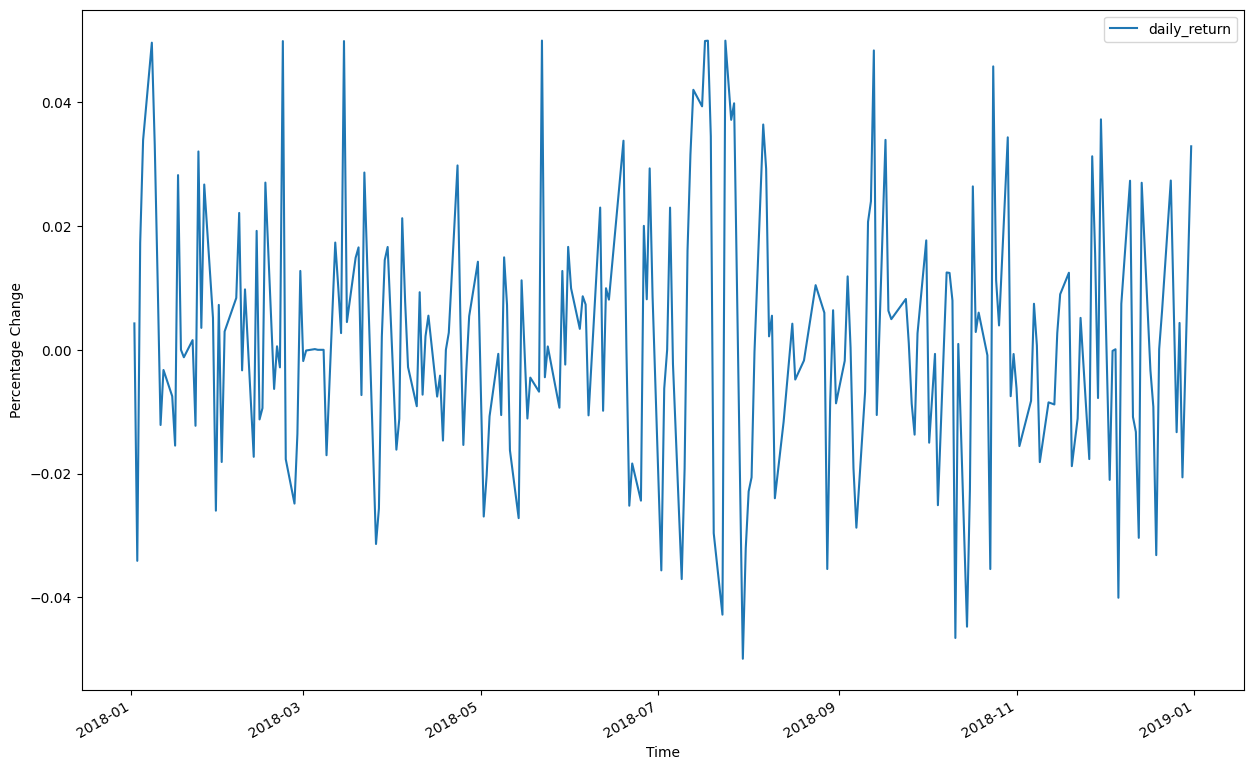

In [140]:
daily_return = sys['Close'].pct_change() # Calculate the daily returns

sys['daily_return'] = daily_return
plt.ylabel('Percentage Change')

sys['daily_return'].plot(legend = True, figsize=(15,10)) # plot the daily return values

C:\Users\swell\AppData\Local\Temp\ipykernel_69080\2325176549.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sys['daily_return'].dropna(), bins = 100, color = 'red')


<AxesSubplot: xlabel='daily_return', ylabel='Probability Density Value'>

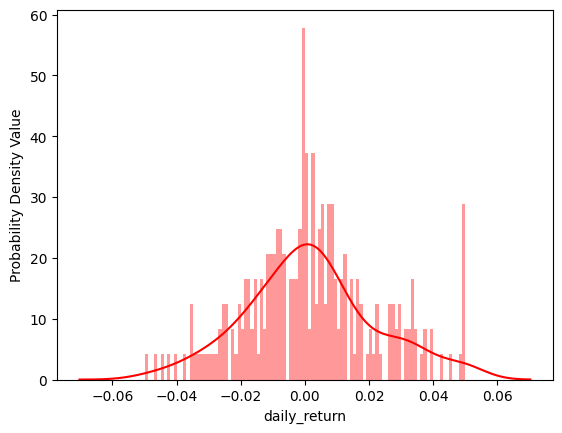

In [141]:
plt.ylabel('Probability Density Value') 

sns.distplot(sys['daily_return'].dropna(), bins = 100, color = 'red') 

The histogram shows how many values each of the one-hundred bins contain. The y-axis here does not provide any information about the histogram. Most of the daily returns for System Ltd are close to zero. This tells us that the changes in price of this stock are not drastic and we can assume that System Ltd has a stable stock.

---

In [142]:
sys = pd.read_csv('Year_2018/SYS.csv')
ns = pd.read_csv('Year_2018/NETSOL.csv')
ptc = pd.read_csv('Year_2018/PTC.csv')
avn = pd.read_csv('Year_2018/AVN.csv') 

sys['Time'] = pd.to_datetime(sys.Time)
ns['Time'] = pd.to_datetime(ns.Time)
ptc['Time'] = pd.to_datetime(ptc.Time)
avn['Time'] = pd.to_datetime(avn.Time)

sys = sys.set_index('Time')
ns = ns.set_index('Time')
ptc = ptc.set_index('Time')
avn = avn.set_index('Time')

In [143]:
df = pd.DataFrame({'SYS': sys['Close'], 
                   'NETSOL': ns['Close'], 
                   'PTC': ptc['Close'], 
                   'AVN': avn['Close']})

print("The New DataFrame\n", df.head())

corr = (df.dropna()).corr() # Calculating correlation after dropping null values

print("The correlations\n", corr)

The New DataFrame
               SYS  NETSOL    PTC    AVN
Time                                   
2018-01-01  75.00   64.38  13.34  35.18
2018-01-02  75.32   65.38  13.21  35.07
2018-01-03  72.75   64.00  13.12  35.29
2018-01-04  74.01   65.90  13.74  35.52
2018-01-05  76.52   67.54  13.50  37.19
The correlations
              SYS   NETSOL       PTC       AVN
SYS     1.000000  0.78341 -0.787943  0.901075
NETSOL  0.783410  1.00000 -0.703370  0.741200
PTC    -0.787943 -0.70337  1.000000 -0.844307
AVN     0.901075  0.74120 -0.844307  1.000000


<AxesSubplot: >

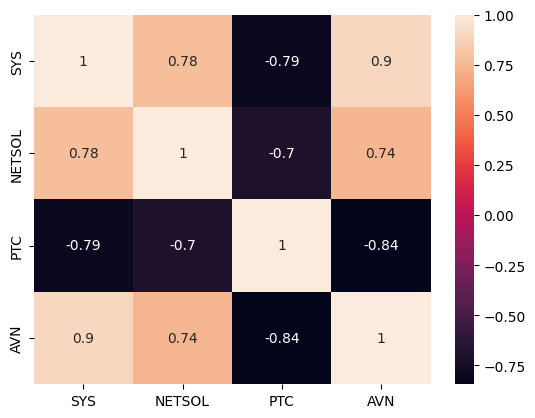

In [144]:
df = pd.DataFrame({'SYS': sys['Close'], 
                   'NETSOL': ns['Close'], 
                   'PTC': ptc['Close'], 
                   'AVN': avn['Close']})

corr = (df.dropna()).corr()

sns.heatmap(corr, annot = True) # Plotting heatmap

The correlation values are properly separated and easy to comprehend on a heatmap. The highest correlation value is of Systems Ltd and Avanceon, which is 0.9. This means that these two companies are highly correlated in a positive way. So, if the stock value of one company goes up, the value of the other company also goes up and vice versa.

                 SYS    NETSOL       PTC       AVN
Time                                              
2018-01-01       NaN       NaN       NaN       NaN
2018-01-02  0.004267  0.015533 -0.009745 -0.003127
2018-01-03 -0.034121 -0.021107 -0.006813  0.006273
2018-01-04  0.017320  0.029688  0.047256  0.006517
2018-01-05  0.033914  0.024886 -0.017467  0.047016
...              ...       ...       ...       ...
2018-12-24  0.027372 -0.000499 -0.006148  0.015297
2018-12-26 -0.013321  0.007863  0.006186  0.036624
2018-12-27  0.004346 -0.048793 -0.003074  0.006853
2018-12-28 -0.020624 -0.049993 -0.009250 -0.006220
2018-12-31  0.032904 -0.048513 -0.003112 -0.023618

[247 rows x 4 columns]


<AxesSubplot: >

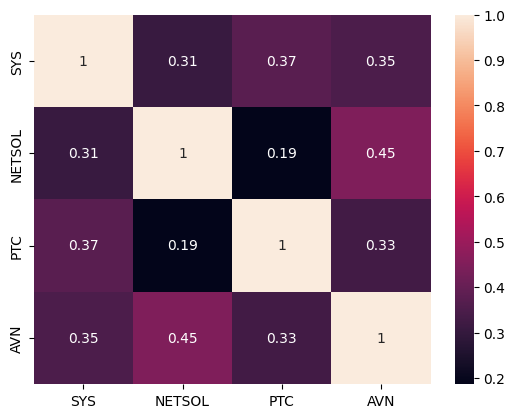

In [145]:
all_returns = df.pct_change()
print(all_returns)

corr = (all_returns.dropna()).corr()
sns.heatmap(corr, annot = True)

From this correlation, we can infer that NETSOL and Avanceon are correlated in a positive way. Because the score is above 0.4, it is a strong correlation.

---

# Risk Estimation

For the scope of this project, the risk relates to the amount of capital we could lose on our investment on a daily basis.

The daily risk for the companies stock prices can be calculated by taking the standard deviation of the daily returns. The daily returns and risks can be visualized using a scatter plot, which can give us a better understanding of the return vs. risk ratio of each company’s stock.

Let’s first calculate the average daily return and the risk. Here the risk is the standard deviation of all the daily return values. The standard deviation measures how far the values are from the mean or average value. In our case, this distance from the mean value is the value or amount that we are putting at risk by investing in a certain stock.

In [146]:
ret = all_returns.dropna() # drop the null values


avg_daily_return = ret.mean() # Take mean of the daily return of all companies
print("Averge daily return of companies\n", avg_daily_return)

daily_risk = ret.std() # Take standard deviation of the daily return of all companies
print("\nDaily Risk or standard deviation of companies\n", daily_risk)

Averge daily return of companies
 SYS       0.001755
NETSOL    0.000897
PTC      -0.001173
AVN       0.003843
dtype: float64

Daily Risk or standard deviation of companies
 SYS       0.020158
NETSOL    0.034407
PTC       0.017892
AVN       0.027037
dtype: float64


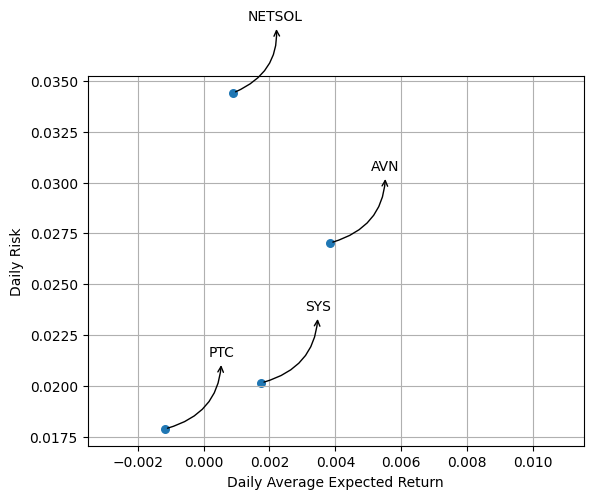

In [147]:
ret = all_returns.dropna()

avg_daily_return = ret.mean()
daily_risk = ret.std()

plt.xlabel("Daily Average Expected Return")
plt.ylabel("Daily Risk")

plt.xlim(ret.mean().min() + ret.mean().min()*2, ret.mean().max() + ret.mean().max()*2)

for label, x, y in zip(ret.columns, ret.mean(), ret.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '<-', connectionstyle = 'arc3,rad=-0.4'))

plt.grid()
plt.scatter(avg_daily_return, daily_risk, s = 30)

plt.show()

The above plot can provide some relevant information about how much risk a particular stock holds for how much of an average return.

So, The following results can be inferred:

1. NETSOL stock has a little positive daily return and a very high risk, which means the loss is also high.

1. Avanceon has a high positive daily return, and the risk value is also less than NETSOL.

1. Systems Ltd has a positive daily return, but it is less than Avanceon. The risk value is less than NETSOL and Avanceon so it can be considered a good stock.

1. The PTC stock has the lowest risk value, but its average daily return value is negative. This indicates that even though our losses would be little, there would not be a positive return for our investment.

These results support the assumptions we made previously that Systems Ltd and Avanceon stocks are better for investments than others.

Now, let’s suppose we want to invest $100,000 in some stocks and want to know what our maximum loss for a day is.

In [148]:
all_returns = df.pct_change()

investment = 100000

loss = (abs(all_returns.quantile(0.1))) * investment
loss = loss.sort_values(ascending = False)

print("-"*80)
print('Maximum possible loss per day (with 90% accuracy) - initial investment $100,000 :')
print("-"*80)
print(loss)

--------------------------------------------------------------------------------
Maximum possible loss per day (with 90% accuracy) - initial investment $100,000 :
--------------------------------------------------------------------------------
NETSOL    4948.152026
AVN       3163.165179
SYS       2344.682683
PTC       1909.463216
Name: 0.1, dtype: float64


The number of values at risk *is in the same order* as detected by the scatter plot. **NETSOL** has the **highest loss** and **PTC** has the **lowest loss value**.

---

# Predicting Future Stock Behavior

There are two main techniques used to analyze stock behavior.

1. Fundamental analysis: This mostly deals with the intrinsic value of companies based on the various changes in their financials on a regular basis.

1. Technical analysis: This provides results based on the historical data of a company’s stock.

Fundamental analysis is beyond the scope of this project, and the information required for it is also not easily accessible.

Until now, our focus has been on technical analysis, as we calculated various results from the historical data of the companies. However, these techniques won’t help us predict the random and irregular behavior of stocks.

## Random walk theory

Many analysts believe that the stock market prices follow the random walk theory. This theory states the following:

***The stock market may take random, irregular, and unpredictable paths in determining the prices of stocks. It also assumes that past trends are useless in predicting future prices and that the future price only depends on the current price of the stock.***

More information about the random walk theory can be found [here](https://www.investopedia.com/terms/r/randomwalktheory.asp).

We will use the *random walk theory* to predict the future stock prices of the companies. The Monte Carlo simulation is a technique used to perform predictions based on the random walk theory.

## Monte Carlo Simulation

This method uses randomness to solve problems. It converts the randomness in the variables into probability distributions. It then generates a range of future price values in a normal distribution instead of just one value. More detailed information about this can be found here.

The following is the formula for MonteCarlo simulations:

$$S_{t+1} = S_{t} * e^{Drift + Rv}$$

$$Drift = AveragedDailyReturn - DailyReturnVariance/2 = (r - \frac{\sigma^{2}}{2})$$

$$Rv = STD∗NORMSINV(RAND()) = \sigma * Z * \sqrt{t}$$

where:

* $S_{t+1}$ is the *future price* of a stock.

* $S_{t}$ is the current price of a stock.

* $Rv$ is our random variable; which either pushes the stock price up or down. More information on the NORMSINV() function can be found [here](https://www.isixsigma.com/dictionary/normsinv/).

Logarithmic returns will be calculated instead of daily returns, as they provide more concise information.

In [149]:
daily_returns = sys['Close'].pct_change() # Calculating daily returns

# Calculating log returns from daily returns
log_returns = np.log(1 + daily_returns)

avg = log_returns.mean() # Calculating average of log returns
var = log_returns.var() # Calculating variance

drift = avg - (var / 2.0) # Calculating drift

drift = np.array(drift) # Convert to array

print("The calculated Drift is:", drift)

The calculated Drift is: 0.0013727067354237406


In [150]:
pred_price_overDays = 60 # Number of days
pred_count = 10 # Range of prediction

std = log_returns.std() # Calculating STD
std = np.array(std) # Convert to array

x = np.random.rand(pred_price_overDays, pred_count) # get random multidimensional array

Rv = std * norm.ppf(x) # Calculating Rv

In [151]:
e_value = np.exp(drift + Rv) # Calculating the E value

current_price = sys['Close'].iloc[-1] # Selecting last price of the year

new_prices = np.zeros_like(e_value) # create array to store the results

new_prices[0] = current_price

print(new_prices)

[[109.87 109.87 109.87 109.87 109.87 109.87 109.87 109.87 109.87 109.87]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.   

The Minimum Predicted Price: 93.65491390315174
The Maximum Predicted Price: 140.13146529565662


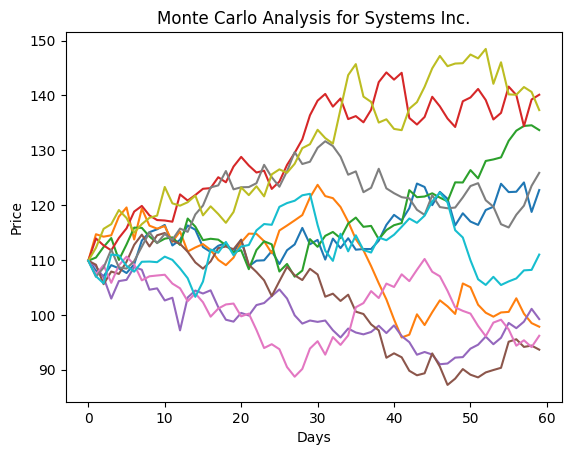

In [152]:
for i in range(1, pred_price_overDays): # Loop over all the days to find their prices
    new_prices[i] = new_prices[i - 1] * e_value[i] # Calculating the future price with formula

print("The Minimum Predicted Price:", new_prices[pred_price_overDays-1].min()) # Get minimum price
print("The Maximum Predicted Price:", new_prices[pred_price_overDays-1].max()) # Get maximum price


plt.xlabel('Days') 
plt.ylabel('Price') 
plt.title('Monte Carlo Analysis for Systems Inc.') 
plt.plot(new_prices) 
plt.show()

---

Let's use the monte carlo analysis on 'SYS' data from 2021 and backtest is against the first two months of 2022 to see how it fares.

In [4]:
sys = pd.read_csv('data/SYS.csv')
ns = pd.read_csv('data/NETSOL.csv')
ptc = pd.read_csv('data/PTC.csv')
avn = pd.read_csv('data/AVN.csv') 

sys['Time'] = pd.to_datetime(sys.Time)
ns['Time'] = pd.to_datetime(ns.Time)
ptc['Time'] = pd.to_datetime(ptc.Time)
avn['Time'] = pd.to_datetime(avn.Time)

sys = sys.set_index('Time')
ns = ns.set_index('Time')
ptc = ptc.set_index('Time')
avn = avn.set_index('Time')

In [5]:
df_raw = pd.DataFrame({'SYS': sys['Close'], 
                   'NETSOL': ns['Close'], 
                   'PTC': ptc['Close'], 
                   'AVN': avn['Close']})

#filtering the data for the year 2021
df = df_raw.loc['2021-01-01':'2022-01-01']

In [6]:
all_returns = df.pct_change()
ret = all_returns.dropna() # drop the null values

avg_daily_return = ret.mean() # Take mean of the daily return of all companies
daily_risk = ret.std()

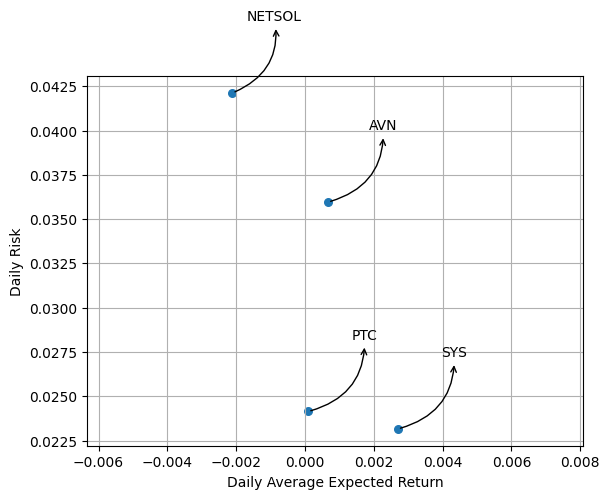

In [302]:
plt.xlabel("Daily Average Expected Return")
plt.ylabel("Daily Risk")

plt.xlim(ret.mean().min() + ret.mean().min()*2, ret.mean().max() + ret.mean().max()*2)

for label, x, y in zip(ret.columns, ret.mean(), ret.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '<-', connectionstyle = 'arc3,rad=-0.4'))

plt.grid()
plt.scatter(avg_daily_return, daily_risk, s = 30)

plt.show()

In [ ]:
from datetime import datetime
datelist = pd.date_range("Jan 1, 2022", periods=60).tolist()

The Minimum Predicted Price for SYS: 537.4511813981773
The Maximum Predicted Price for SYS: 1206.4351519470988


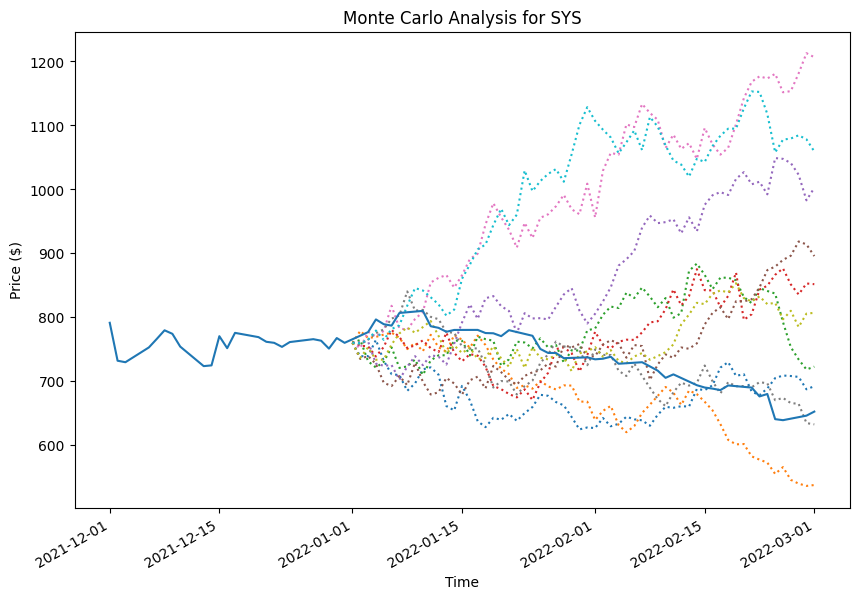

----------------------------------------------------------------------------------------------------
The Minimum Predicted Price for NETSOL: 50.189407589599845
The Maximum Predicted Price for NETSOL: 165.2394637733138


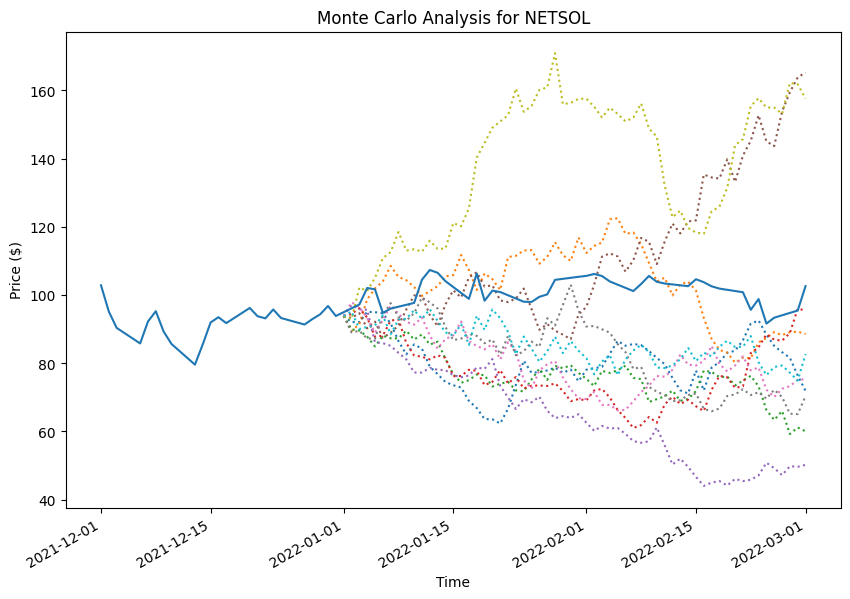

----------------------------------------------------------------------------------------------------
The Minimum Predicted Price for PTC: 6.702263276669863
The Maximum Predicted Price for PTC: 10.875009312106654


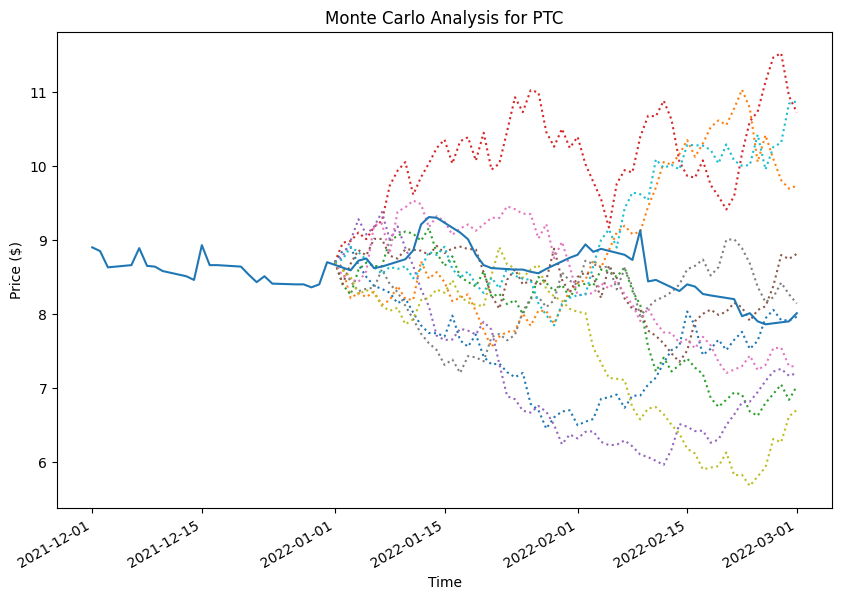

----------------------------------------------------------------------------------------------------
The Minimum Predicted Price for AVN: 66.12494693810658
The Maximum Predicted Price for AVN: 146.75755375850184


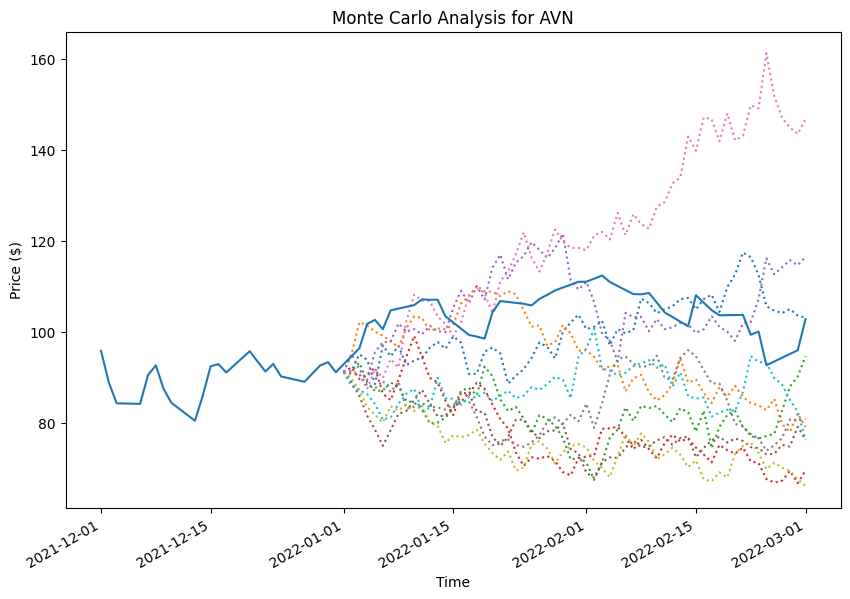

----------------------------------------------------------------------------------------------------


In [18]:
for col in df.columns:
    daily_returns = df[col].pct_change() # Calculating daily returns

    # Calculating log returns from daily returns
    log_returns = np.log(1 + daily_returns)

    avg = log_returns.mean() # Calculating average of log returns
    var = log_returns.var() # Calculating variance

    drift = avg - (var / 2.0) # Calculating drift

    drift = np.array(drift) # Convert to array

    pred_price_overDays = 60 # Number of days
    pred_count = 10 # Range of prediction

    std = log_returns.std() # Calculating STD
    std = np.array(std) # Convert to array

    x = np.random.rand(pred_price_overDays, pred_count) # get random multidimensional array

    Rv = std * norm.ppf(x) # Calculating Rv

    e_value = np.exp(drift + Rv) # Calculating the E value

    current_price = df[col].iloc[-1] # Selecting last price of the year

    new_prices = np.zeros_like(e_value) # create array to store the results

    new_prices[0] = current_price

    for i in range(1, pred_price_overDays): # Loop over all the days to find their prices
        new_prices[i] = new_prices[i - 1] * e_value[i] # Calculating the future price with formula

    print(f"The Minimum Predicted Price for {col}:", new_prices[pred_price_overDays-1].min()) # Get minimum price
    print(f"The Maximum Predicted Price for {col}:", new_prices[pred_price_overDays-1].max()) # Get maximum price

    new_prices = pd.DataFrame(new_prices)
    #set dataframe index to date
    new_prices.index = datelist

    plt.figure(figsize=(10,7))
    plt.xlabel('Days') 
    plt.ylabel('Price ($)') 
    plt.title(f'Monte Carlo Analysis for {col}') 
    plt.plot(new_prices, linestyle=':')
    df_raw['2021-12-01':'2022-03-01'][col].plot()
    #rotate and align the tick labels so they look better
    plt.gcf().autofmt_xdate()
    plt.show()
    print('-'*100)